# Face média da turma 😄

Importação das bibliotecas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

#Exibição na mesma tela do Jupyter
%matplotlib inline

plt.style.use('seaborn')
sns.set_style("whitegrid", {'axes.grid' : False})

Geração de face média com base nas fotos os alunos do curso, separado por sexo. A ideia deste experimento é evidenciar um pouco sobre como o método de classificação de faces **Eingen Faces** utiliza uma face média para estabelecer aproximações por similaridade.

Para tornar mais preciso, utilizamos uma extração de faces por classificador em cascata de Haar como etapa de normalização inicial.

Nosso dataset se encontra no diretório "eigen-faces". Os arquivos iniciados por h são dos homens e os iniciados por m são das mulheres.

Este código foi adaptado deste [artigo](https://www.learnopencv.com/eigenface-using-opencv-c-python/) de Satya Mallick. O repositório original se encontra neste [link](https://github.com/spmallick/learnopencv/blob/master/EigenFace/EigenFace.py).

Função de leitura de imagem em lote e recorte de rosto identificado.

In [2]:
# Read images from the directory
def readImages(path, gender):
     
    classificador_face = cv2.CascadeClassifier('classificadores/haarcascade_frontalface_default.xml')
    
    # Create array of array of images.
    images = []
    
    # List all files in the directory and read points from text files one by one
    for filePath in sorted(os.listdir(path)):
        fileExt = os.path.splitext(filePath)[1]
        
        f = 0
            
        if fileExt in [".jpg", ".jpeg"]:
            if gender == "h":
                if not filePath.startswith("h"):
                    continue
            else:
                if not filePath.startswith("m"):
                    continue

            # Add to array of images
            imagePath = os.path.join(path, filePath)            
            im = cv2.imread(imagePath)
            im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
            face = classificador_face.detectMultiScale(im_gray, 1.3, 3)
            
            for (x,y,w,h) in face:
                roi = im[y:y+h, x:x+w]
                
                if len(roi) == 0:
                    continue
                
                roi = cv2.resize(roi, (100,100))
                im = np.float32(roi)/255.0
                images.append(im)
                imFlip = cv2.flip(im, 1);
                images.append(imFlip)
            
            if face is ():
                print("Não encontrado rosto nesta imagem " + imagePath)
    
    numImages = int(len(images) / 2)
    print(str(numImages) + " imagens com rosto encontrado.")
    
    return images

Função de criação de matriz de dados baseado num conjunto de imagens. A partir desta matriz é que será calculado a face média e PCA.

In [3]:
def createDataMatrix(images):
    ''' 
    Allocate space for all images in one data matrix.
    The size of the data matrix is
    ( w  * h  * 3, numImages )
    where,
    w = width of an image in the dataset.
    h = height of an image in the dataset.
    3 is for the 3 color channels.
    '''

    numImages = len(images)
    print("Número de imagens: " + str(numImages))
    
    sz = images[0].shape
    print("Shape da imagem: " + str(sz))
    
    data = np.zeros((numImages, sz[0] * sz[1] * sz[2]), dtype=np.float32)
    for i in range(0, numImages):
        image = images[i].flatten()
        data[i,:] = image
    
    return data

## Organizando imagens

Separando imagens por turmas e por gênero biológico.

In [4]:
#Carrendo imagens de cada turma

images_10h = readImages("eingen-faces/10ia", "h")
images_10m = readImages("eingen-faces/10ia", "m")

images_8h = readImages("eingen-faces/8ia", "h")
images_8m = readImages("eingen-faces/8ia", "m")

images_7h = readImages("eingen-faces/7ia", "h")
images_7m = readImages("eingen-faces/7ia", "m")

images_6h = readImages("eingen-faces/6ia", "h")
images_6m = readImages("eingen-faces/6ia", "m")

images_3h = readImages("eingen-faces/3ia", "h")
images_3m = readImages("eingen-faces/3ia", "m")

images_4h = readImages("eingen-faces/4ia", "h")
images_4m = readImages("eingen-faces/4ia", "m")


# Juntando todas as imagens para calcular face de homens
images_h = images_8h + images_7h + images_6h + images_4h + images_3h

# Juntando todas as imagens para calcular face de mulheres
images_m = images_8m + images_7m + images_6m + images_4m + images_3m

# Juntando todas as imagens para calcular face geral
images = images_m + images_h

# Mariz para cálculo do PCA
data = createDataMatrix(images)

# Cálculo dos Eingen Vectores
print("Processando PCA ", end="...")
mean, eigenVectors = cv2.PCACompute(data, mean=None)
print("Terminado")

38 imagens com rosto encontrado.
2 imagens com rosto encontrado.
26 imagens com rosto encontrado.
3 imagens com rosto encontrado.
Não encontrado rosto nesta imagem eingen-faces/7ia\h_334483.jpg
Não encontrado rosto nesta imagem eingen-faces/7ia\h_335064.jpg
38 imagens com rosto encontrado.
2 imagens com rosto encontrado.
33 imagens com rosto encontrado.
7 imagens com rosto encontrado.
39 imagens com rosto encontrado.
3 imagens com rosto encontrado.
40 imagens com rosto encontrado.
4 imagens com rosto encontrado.
Número de imagens: 390
Shape da imagem: (100, 100, 3)
Processando PCA ...Terminado


Face média de todas as imagens coletadas.

Text(0.5, 1.0, 'Face Média')

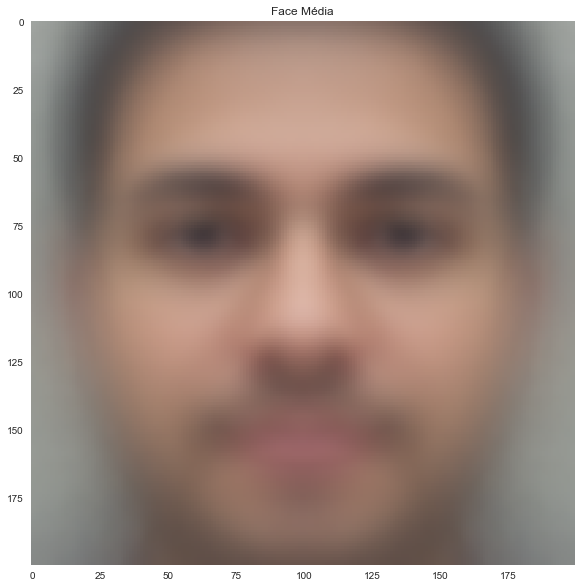

In [5]:
sz = images[0].shape
averageFace = mean.reshape(sz)

# Saída
output = cv2.resize(averageFace, (0,0), fx=2, fy=2)
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(output)
plt.title("Face Média")

Incorporando em uma função para poder alterar entre masculino e feminino.

In [6]:
def get_mean_face(path, gender):
    images = readImages(path, gender)

    sz = images[0].shape

    data = createDataMatrix(images)
    mean, eigenVectors = cv2.PCACompute(data, mean=None)
    
    eigenFaces = []
    
    for eigenVector in eigenVectors:
        eigenFace = eigenVector.reshape(sz)
        eigenFaces.append(eigenFace)

    averageFace = mean.reshape(sz)
    output = cv2.cvtColor(averageFace, cv2.COLOR_BGR2RGB)
    
    return output, eigenFaces

Essa função recebe uma lista de imagens e retorna a face média e os eingen vectors.

In [7]:
def get_mean_face_images(images):
    sz = images[0].shape

    data = createDataMatrix(images)
    mean, eigenVectors = cv2.PCACompute(data, mean=None)
    
    eigenFaces = []
    
    for eigenVector in eigenVectors:
        eigenFace = eigenVector.reshape(sz)
        eigenFaces.append(eigenFace)

    averageFace = mean.reshape(sz)
    output = cv2.cvtColor(averageFace, cv2.COLOR_BGR2RGB)
    
    return output, eigenFaces

## Face média por gênero biológico geral

Coletando imagens de cada grupo.

In [8]:
face_media_geral, _ = get_mean_face_images(images)
face_media_homem, _ = get_mean_face_images(images_h)
face_media_mulher, _ = get_mean_face_images(images_m)

Número de imagens: 390
Shape da imagem: (100, 100, 3)
Número de imagens: 352
Shape da imagem: (100, 100, 3)
Número de imagens: 38
Shape da imagem: (100, 100, 3)


Text(0.5, 1.0, 'Face Média Mulher')

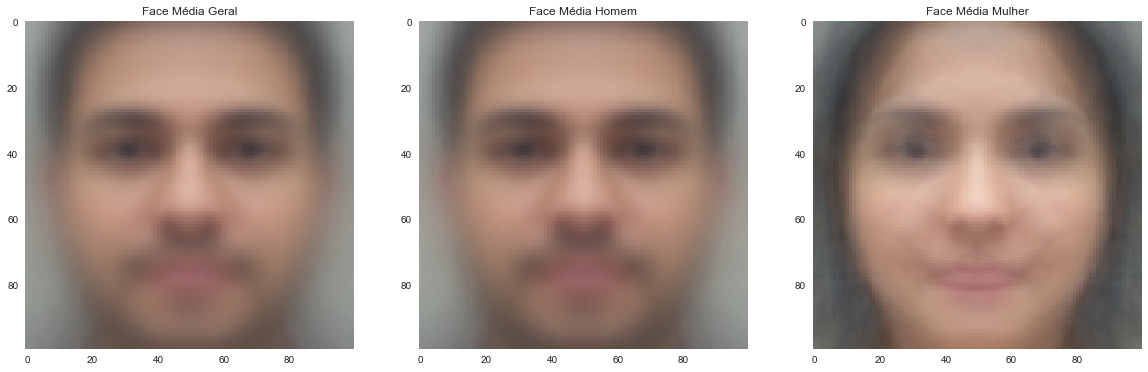

In [9]:
plt.figure(figsize=(20,20))

plt.subplot(1,3,1)
plt.imshow(face_media_geral)
plt.title("Face Média Geral")

plt.subplot(1,3,2)
plt.imshow(face_media_homem)
plt.title("Face Média Homem")

plt.subplot(1,3,3)
plt.imshow(face_media_mulher)
plt.title("Face Média Mulher")

## Face média por turma por gênero biológico
Coletando imagens de cada grupo.

In [10]:
face_media_geral, _ = get_mean_face_images(images_10h + images_10m)
face_media_homem, _ = get_mean_face_images(images_10h)
face_media_mulher, _ = get_mean_face_images(images_10m)

Número de imagens: 80
Shape da imagem: (100, 100, 3)
Número de imagens: 76
Shape da imagem: (100, 100, 3)
Número de imagens: 4
Shape da imagem: (100, 100, 3)


Text(0.5, 1.0, 'Face Média Mulher')

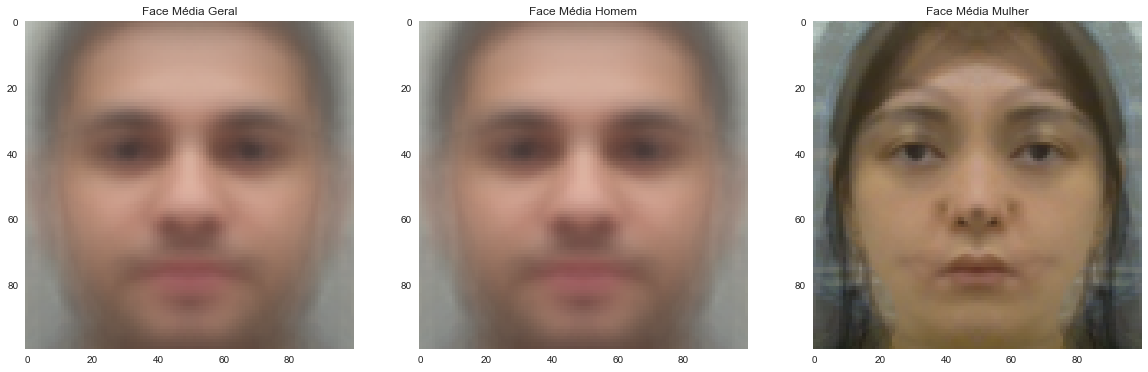

In [11]:
plt.figure(figsize=(20,20))

plt.subplot(1,3,1)
plt.imshow(face_media_geral)
plt.title("Face Média Geral")

plt.subplot(1,3,2)
plt.imshow(face_media_homem)
plt.title("Face Média Homem")

plt.subplot(1,3,3)
plt.imshow(face_media_mulher)
plt.title("Face Média Mulher")

## Criação de novas faces

Navegando nos pesos dos componentes principais (PCA), é possível reconstruir novos rostos a partir do espaço de faces criado pelos eingen faces.

Experimente incluir pesos positivos ou negativos, por exemplo -20, -10, 0 (é a média), 10, 20.

In [17]:
def createNewFace(averageFace, weight, eingenface, eigenFaces):
    output = averageFace
    output = np.add(output, eigenFaces[eingenface] * weight)
    output = cv2.resize(output, (0,0), fx=2, fy=2)
    return output

In [18]:
face_media, eingenFaces = get_mean_face_images(images)

Número de imagens: 390
Shape da imagem: (100, 100, 3)


Text(0.5, 1.0, 'Nova face masculina')

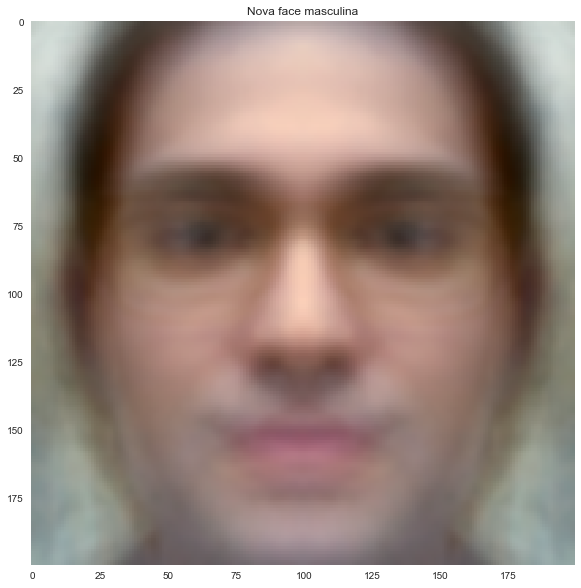

In [19]:
plt.figure(figsize=(10,10))
plt.imshow(createNewFace(face_media, 20, 8, eingenFaces))
plt.title("Nova face masculina")

In [20]:
face_media_mulher, eigenFaces = get_mean_face("eingen-faces/8ia", "m")

3 imagens com rosto encontrado.
Número de imagens: 6
Shape da imagem: (100, 100, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Face Média Mulher')

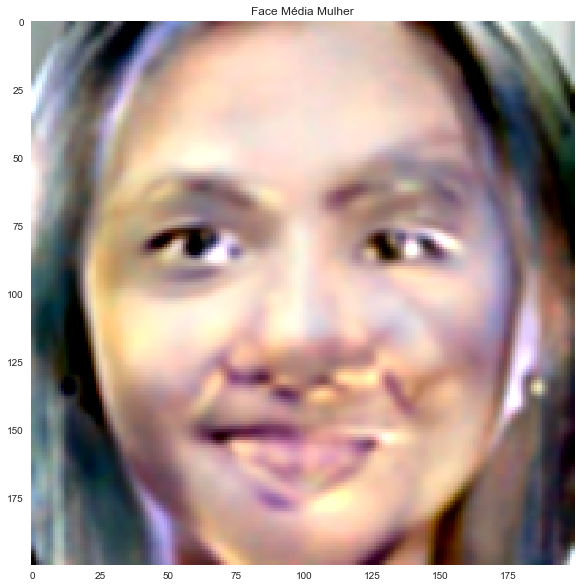

In [21]:
plt.figure(figsize=(10,10))
plt.imshow(createNewFace(face_media_mulher, 30, -2, eigenFaces))
plt.title("Face Média Mulher")